In [1]:
import numpy as np
import pandas as pd

In [2]:
pip install shap

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 546.8/546.8 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.2/26.2 MB 37.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 43.1 MB/s eta 0:00:00
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.1
    Uninstalling numpy-2.3.1:
      Successfully uninstalled numpy-2.3.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [shap]7/8 [shap]]te]
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --force-reinstall numpy==2.2.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 17.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_auc_score

import shap

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['figure.autolayout'] = True

print("Libraries imported successfully")


Libraries imported successfully


/Users/wilco/DAE Projects/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
df = pd.read_csv('hypertension_dataset.csv')
df.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,NaN,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,NaN,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,NaN,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1985 non-null   int64  
 1   Salt_Intake       1985 non-null   float64
 2   Stress_Score      1985 non-null   int64  
 3   BP_History        1985 non-null   object 
 4   Sleep_Duration    1985 non-null   float64
 5   BMI               1985 non-null   float64
 6   Medication        1186 non-null   object 
 7   Family_History    1985 non-null   object 
 8   Exercise_Level    1985 non-null   object 
 9   Smoking_Status    1985 non-null   object 
 10  Has_Hypertension  1985 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 170.7+ KB


In [8]:
df.describe

<bound method NDFrame.describe of       Age  Salt_Intake  Stress_Score       BP_History  Sleep_Duration   BMI  \
0      69          8.0             9           Normal             6.4  25.8   
1      32         11.7            10           Normal             5.4  23.4   
2      78          9.5             3           Normal             7.1  18.7   
3      38         10.0            10     Hypertension             4.2  22.1   
4      41          9.8             1  Prehypertension             5.8  16.2   
...   ...          ...           ...              ...             ...   ...   
1980   56         10.2             0           Normal             6.5  25.0   
1981   29          8.9             4     Hypertension             6.9  16.9   
1982   64          5.9             9           Normal             5.6  18.9   
1983   35          7.4             8  Prehypertension             8.2  29.2   
1984   38          7.3             0           Normal             8.3  18.6   

         Medicati

In [10]:
target_col = 'Has_Hypertension'

plt.figure(figsize=(8,6))
sns.countplot(x=target_col,palette='viridis')
plt.title('Distribution of the Target Variable (Hypertension Risk)',fontsize = 16)
plt.xlabel('Hypertension Risk (No / Yes)',fontsize = 12)
plt.ylabel('Patient Count',fontsize = 12)
plt.show()

TypeError: 'module' object is not callable

In [14]:
import matplotlib.pyplot as plt

/var/folders/vl/z6gfc_1s4mbd9k5knjb6qm1c0000gn/T/ipykernel_12832/4043568696.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=target_col, palette='viridis')


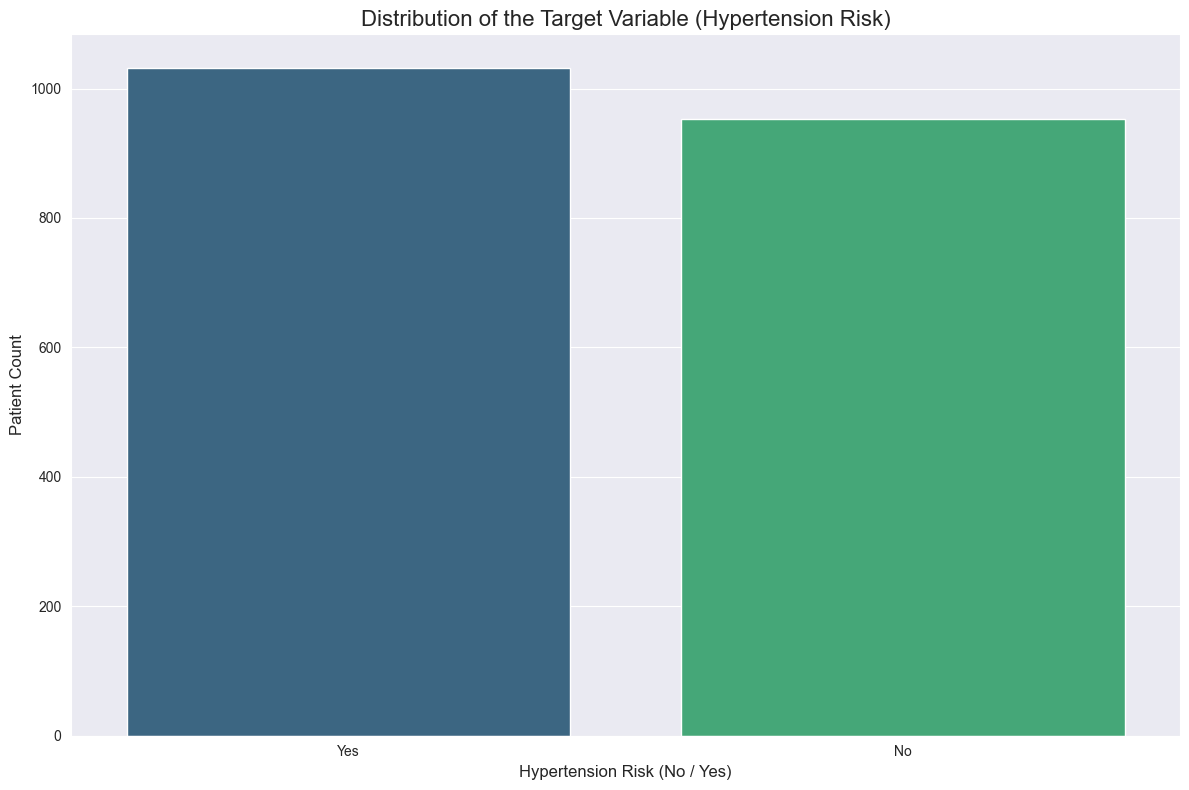

In [15]:
target_col = 'Has_Hypertension'

plt.figsize=(8,6)
sns.countplot(data=df, x=target_col, palette='viridis')
plt.title('Distribution of the Target Variable (Hypertension Risk)', fontsize=16)
plt.xlabel('Hypertension Risk (No / Yes)', fontsize=12)
plt.ylabel('Patient Count', fontsize=12)
plt.show()

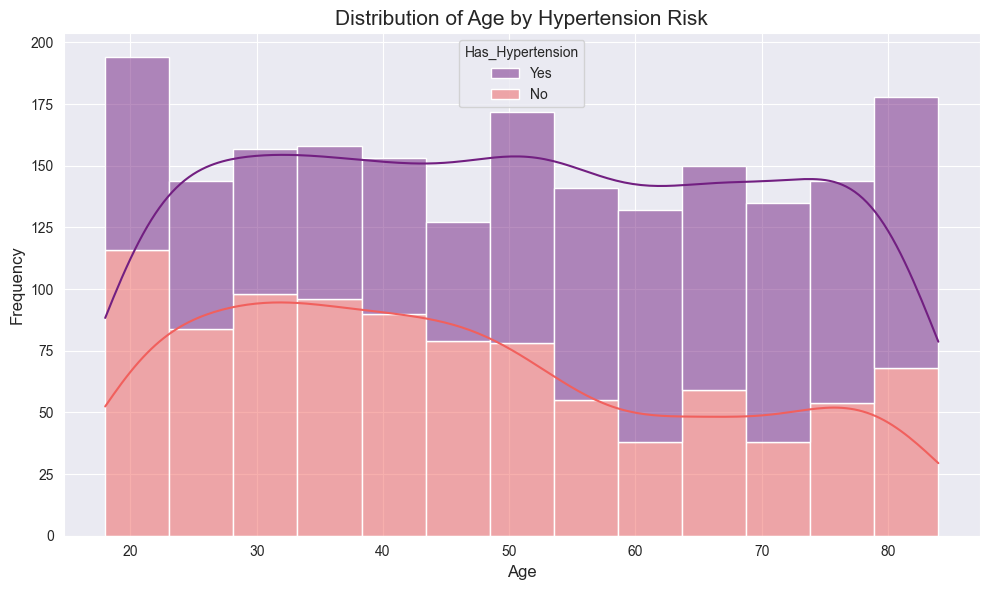

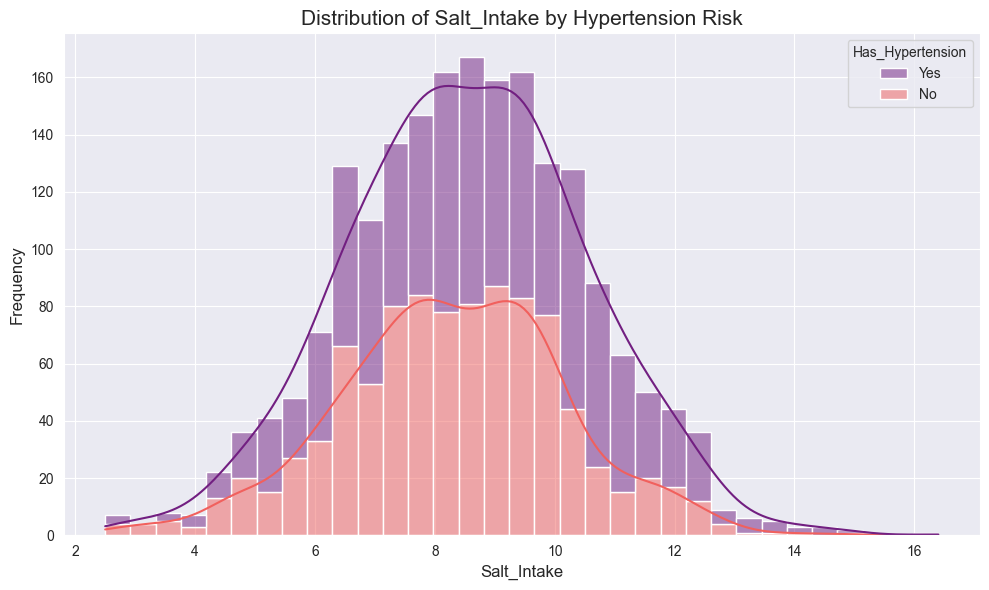

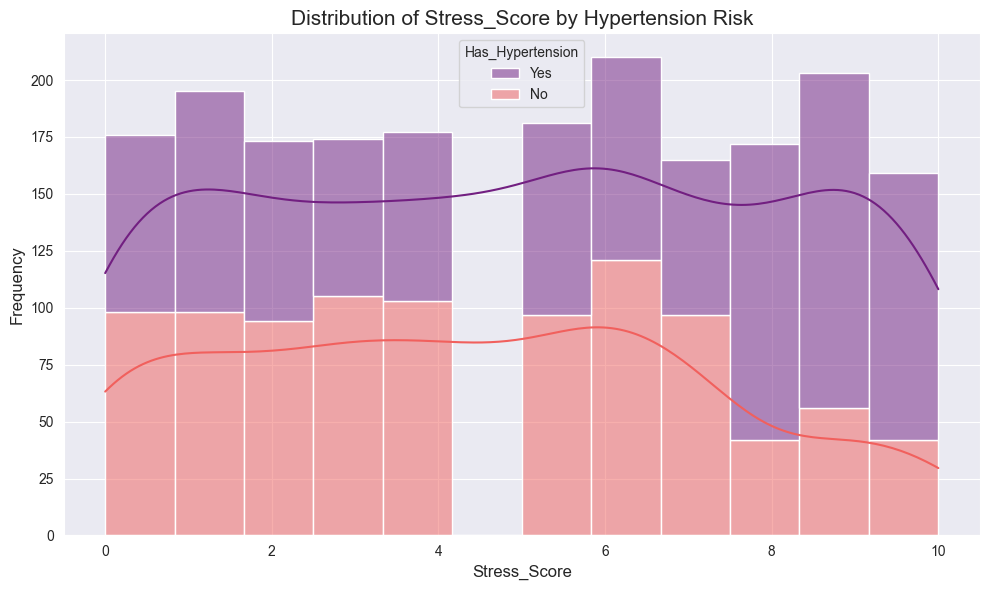

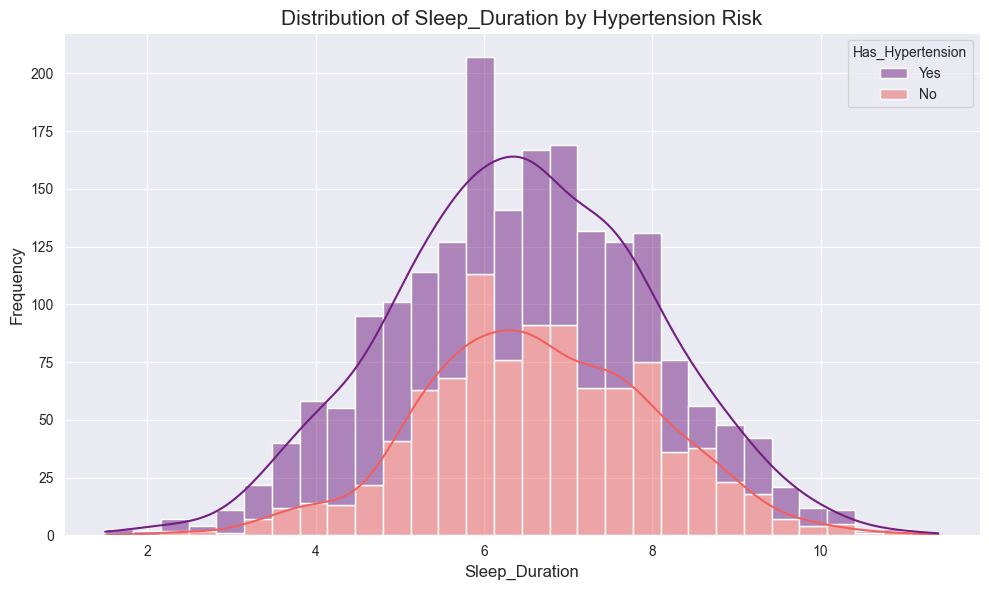

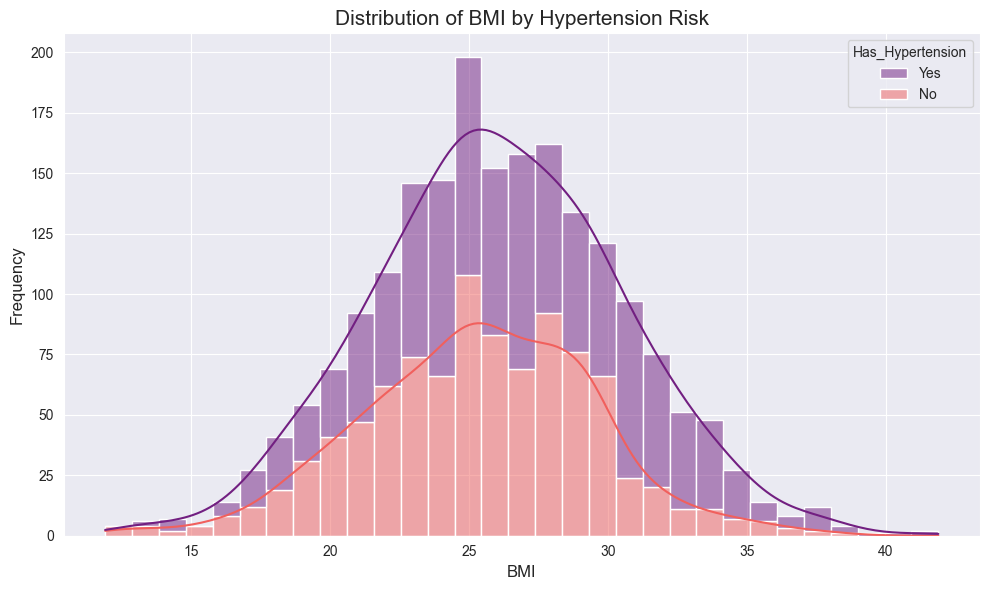

In [16]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
if target_col in numerical_features:
    numerical_features.remove(target_col)
if 'PatientID' in numerical_features:
    numerical_features.remove('PatientID') # Assuming there's a PatientID column

# Create distribution plots for each numerical feature against the target
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, hue=target_col, multiple='stack', palette='magma', kde=True)
    plt.title(f'Distribution of {feature} by Hypertension Risk', fontsize=15)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

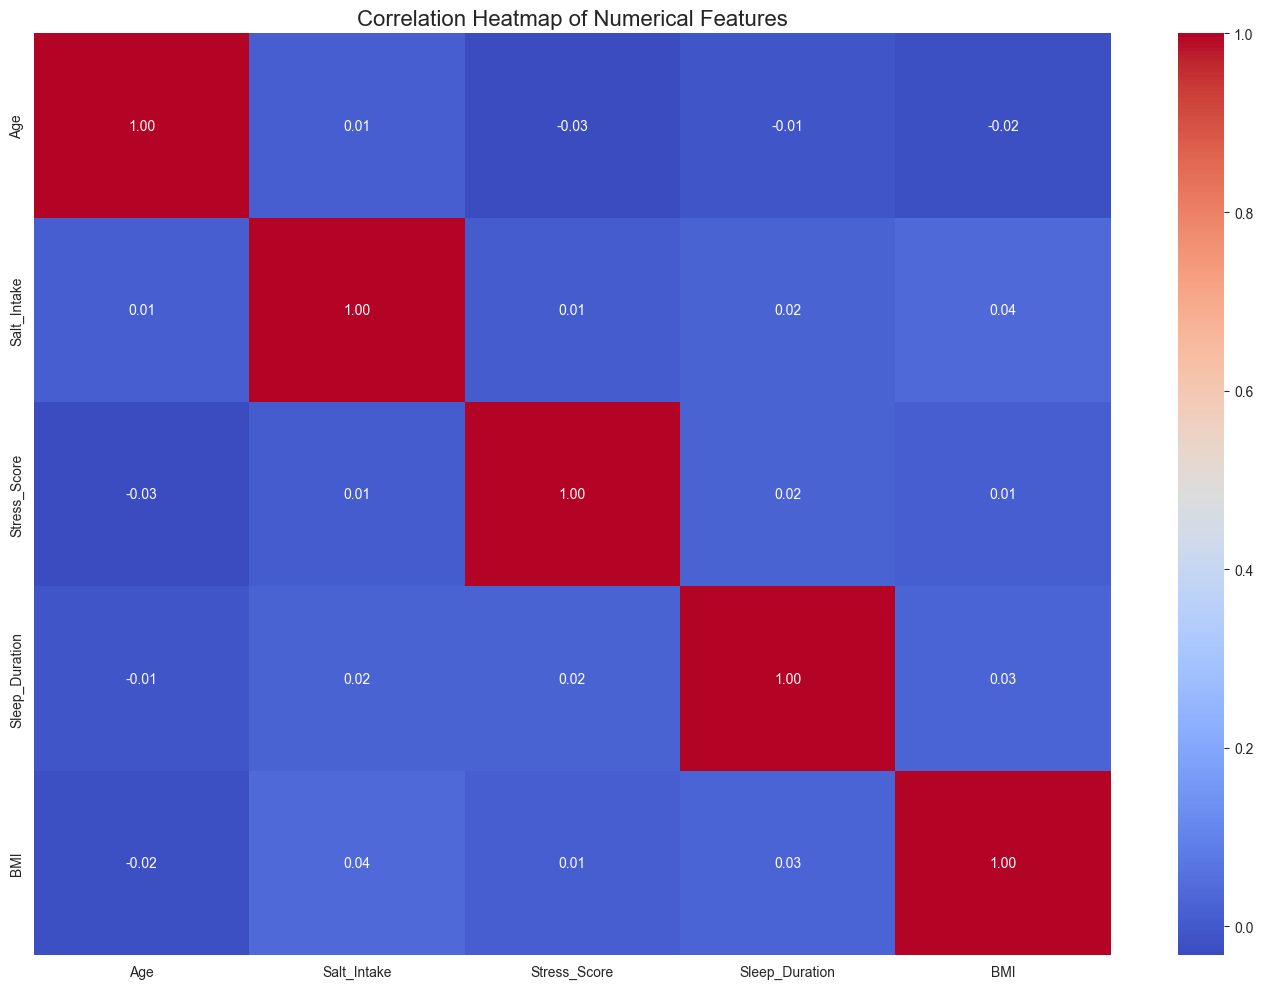

In [17]:
plt.figure(figsize=(14, 10))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

In [18]:
if 'PatientID' in df.columns:
    df = df.drop('PatientID', axis=1)

X = df.drop(target_col, axis=1)
y = df[target_col]

for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    print(f"Column '{col}' encoded.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining data shape (X_train): {X_train.shape}")
print(f"Testing data shape (X_test): {X_test.shape}")

Column 'BP_History' encoded.
Column 'Medication' encoded.
Column 'Family_History' encoded.
Column 'Exercise_Level' encoded.
Column 'Smoking_Status' encoded.

Training data shape (X_train): (1588, 10)
Testing data shape (X_test): (397, 10)


In [19]:
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, oob_score=True)

model.fit(X_train, y_train)
print("Random Forest model trained successfully!")
print(f"Out-of-Bag (OOB) Score: {model.oob_score_ * 100:.2f}%")

Random Forest model trained successfully!
Out-of-Bag (OOB) Score: 96.73%


Model Accuracy: 96.22%
ROC-AUC Score: 0.9937

Classification Report:
                  precision    recall  f1-score   support

Not Hypertensive       0.98      0.94      0.96       191
    Hypertensive       0.95      0.98      0.96       206

        accuracy                           0.96       397
       macro avg       0.96      0.96      0.96       397
    weighted avg       0.96      0.96      0.96       397



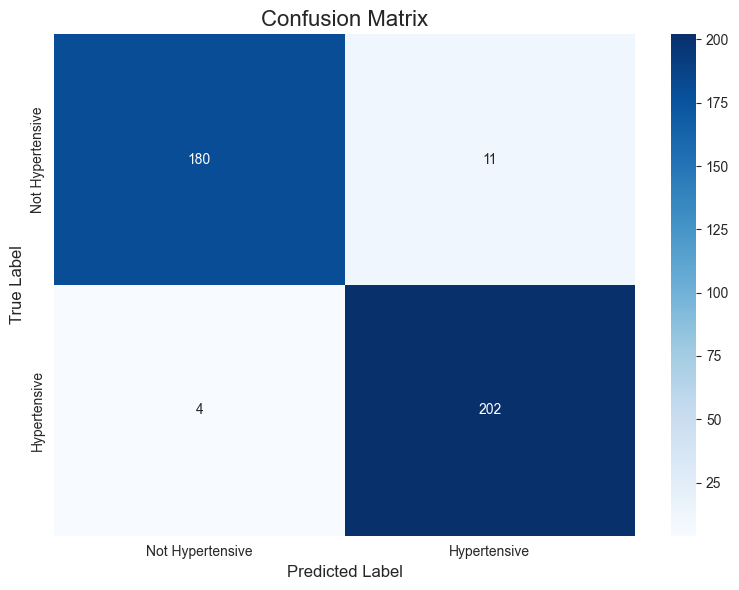

In [22]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probabilities for the positive class (1)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Display a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Hypertensive', 'Hypertensive']))

# Visualize the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Hypertensive', 'Hypertensive'],
            yticklabels=['Not Hypertensive', 'Hypertensive'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

In [23]:
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)

shap_values_class1 = shap_values[1]

Displaying SHAP Summary Plot...


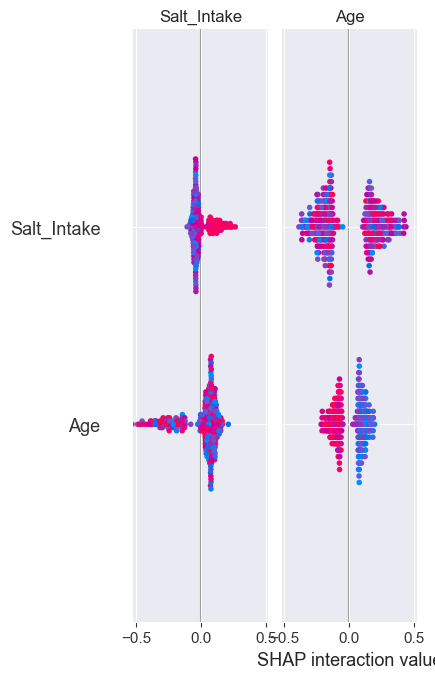

In [27]:
print("Displaying SHAP Summary Plot...")


shap.summary_plot(shap_values, X_test, class_names=['Not Hypertensive', 'Hypertensive'])

In [28]:
patient_index = 0
print(f"\nDisplaying SHAP Force Plot for Patient #{patient_index}...")

shap.initjs()
shap.force_plot(explainer.expected_value[1],
                shap_values_class1[patient_index,:],
                X_test.iloc[patient_index,:],
                matplotlib=False)


Displaying SHAP Force Plot for Patient #0...


DimensionError: Length of features is not equal to the length of shap_values!